Iteration 1.1: p_hat = 0.40000, error = 0.10000
Iteration 1.2: p_hat = 0.39991, error = 0.09991
Iteration 1.3: p_hat = 0.39985, error = 0.09985
Iteration 1.4: p_hat = 0.39973, error = 0.09973
Iteration 1.5: p_hat = 0.39961, error = 0.09961
Iteration 1.6: p_hat = 0.39953, error = 0.09953
Iteration 1.7: p_hat = 0.39939, error = 0.09939
Iteration 1.8: p_hat = 0.39951, error = 0.09951
Iteration 1.9: p_hat = 0.39991, error = 0.09991
Iteration 1.10: p_hat = 0.39969, error = 0.09969
Iteration 1.11: p_hat = 0.39974, error = 0.09974
Iteration 1.12: p_hat = 0.40000, error = 0.10000
Iteration 1.13: p_hat = 0.39985, error = 0.09985
Iteration 1.14: p_hat = 0.39979, error = 0.09979
Iteration 1.15: p_hat = 0.39982, error = 0.09982
Iteration 1.16: p_hat = 0.39943, error = 0.09943
Iteration 1.17: p_hat = 0.39941, error = 0.09941
Iteration 1.18: p_hat = 0.39897, error = 0.09897
Iteration 1.19: p_hat = 0.39912, error = 0.09912
Iteration 1.20: p_hat = 0.39920, error = 0.09920
Iteration 2.1: p_hat = 0.3993

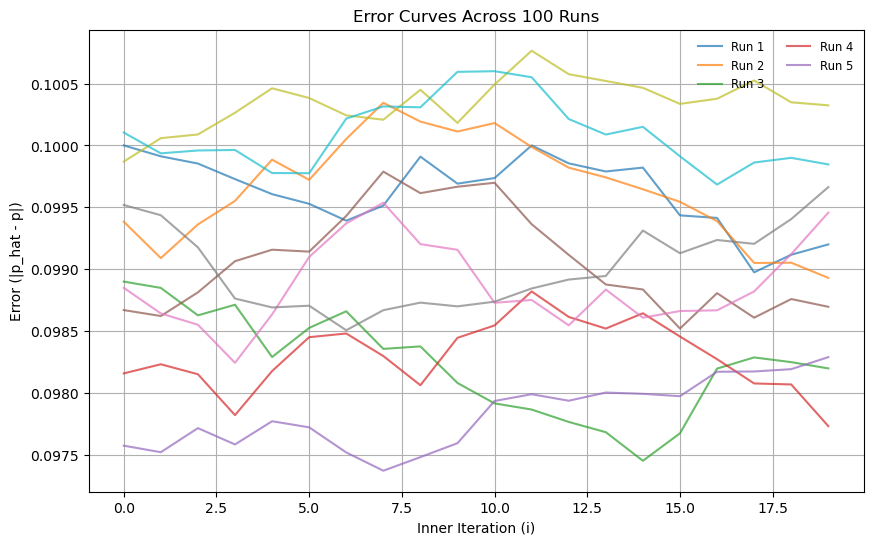

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
p = 0.3  # Target probability
n = 5  # Initial sample size
m = 5000000  # Number of samples to generate in each iteration

# Generate the initial sample
x = np.random.binomial(1, p, n)  # Generate n samples from a binomial distribution
result = []  # List to store results from each outer loop iteration
all_errors = []  # List to store error curves for plotting

# Outer loop, runs 100 times
for k in range(10):
    vec = []  # List to store errors in the inner loop

    # Inner loop, runs 20 times
    for i in range(20):
        p_hat = np.mean(x)  # Calculate the mean of the current sample
        err = abs(p_hat - p)  # Calculate the absolute error
        x = np.random.binomial(1, p_hat, m)  # Generate new samples using p_hat
        vec.append(err)  # Store the error in the list
        print(f"Iteration {k + 1}.{i + 1}: p_hat = {p_hat:.5f}, error = {err:.5f}")

    # Store error curve for this outer loop iteration
    all_errors.append(vec)

    # Compare the minimum error (excluding the first) with the first error
    result.append(min(vec[1:]) < vec[0])  # Append the comparison result (True/False) to the result list

# Compute the final result as the proportion of True values in the result list
final_result = np.mean(result)
print("Final result:", final_result)

# Plotting the error curves
plt.figure(figsize=(10, 6))
for i, error_curve in enumerate(all_errors):
    plt.plot(error_curve, label=f"Run {i + 1}" if i < 5 else "", alpha=0.7)  # Plot only first 5 labels for clarity
plt.xlabel("Inner Iteration (i)")
plt.ylabel("Error (|p_hat - p|)")
plt.title("Error Curves Across 100 Runs")
plt.grid()
plt.legend(loc='upper right', fontsize='small', ncol=2, frameon=False)
plt.show()

